MODULE CODE AND TITLE: GENML801- MACHINE LEARNING 
Date: 26th September 2025 
RQF LEVEL: 8 
DEPARTMENT: ELECTRICAL AND ELECTRONICS ENGINEERING 
PROGRAM: ELECTRONICS AND TELECOMMUNICATION TECHNOLOGY
ACADEMIC YEAR: 2025-2026 

Name: MPWETO CIKURU ELIE 
REG: 25RP20436

Title: Smart Plastic Waste Management using Machine Learning (SVM)

Problem Statement
Existing waste management systems in Rwanda and many developing countries largely rely on manual sorting, which is inefficient, costly, and prone to human error. There is a need for an intelligent system that can automatically detect plastic waste and sort it from non-plastics using sensor readings combined with machine learning models.

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib streamlit --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Replace with your real file (must have columns: sensor1...sensor6 + label)
df = pd.read_csv("sensor_data.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (100, 7)


,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,label
0,0.762435,0.221012,0.414230,0.368988,0.129956,0.515501,1
1,0.538824,0.175343,0.547961,0.156516,0.191200,0.526916,1
2,0.547183,0.120024,0.482279,0.503882,0.121885,0.270691,1
3,0.492703,0.175546,0.497486,0.618698,0.247744,0.743753,1
4,0.686541,0.185377,0.362407,0.444136,0.083402,0.586633,1


Class distribution:
 label
1    50
0    50
Name: count, dtype: int64

Missing values per column:
sensor1    0
sensor2    0
sensor3    0
sensor4    0
sensor5    0
sensor6    0
label      0
dtype: int64


C:\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


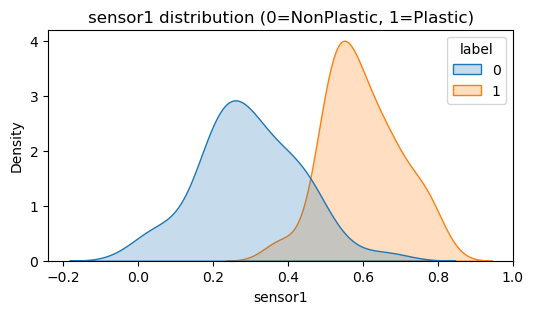

C:\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


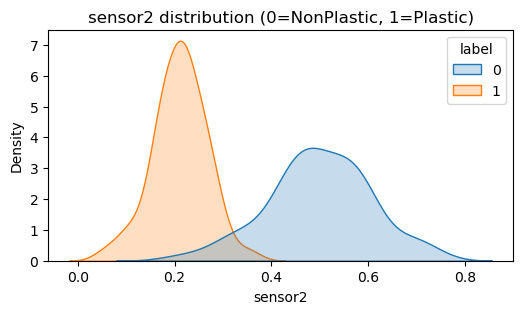

C:\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


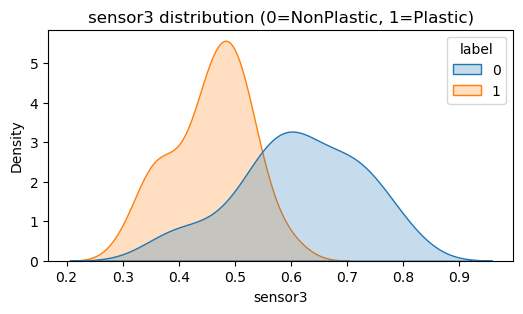

C:\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


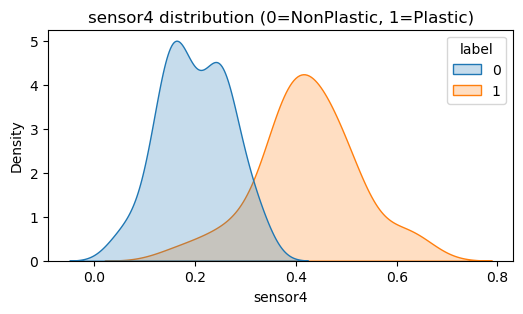

C:\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


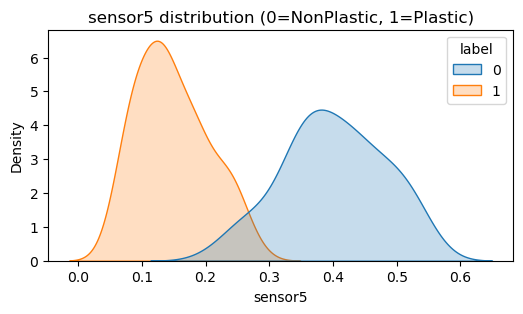

C:\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


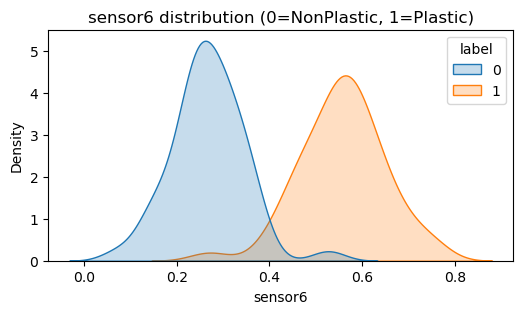

In [6]:
# Class balance
print("Class distribution:\n", df["label"].value_counts())

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Plot sensor distributions
feature_cols = [c for c in df.columns if c.startswith("sensor")]
for col in feature_cols:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)
    plt.title(f"{col} distribution (0=NonPlastic, 1=Plastic)")
    plt.show()

In [7]:
X = df[feature_cols].values
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [8]:
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



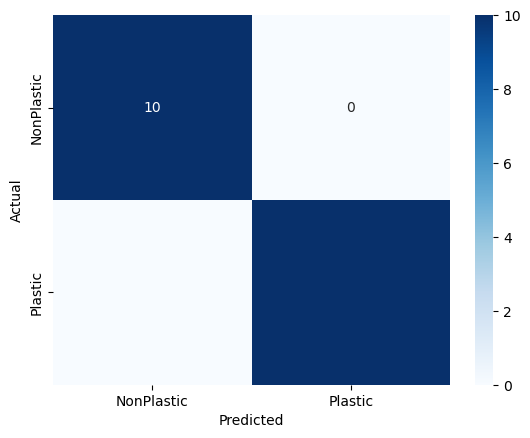

In [9]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["NonPlastic","Plastic"], yticklabels=["NonPlastic","Plastic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
joblib.dump(pipeline, "smart_plastic_sensor_svm.joblib")
print("Model saved as smart_plastic_sensor_svm.joblib")

Model saved as smart_plastic_sensor_svm.joblib


In [11]:
model = joblib.load("smart_plastic_sensor_svm.joblib")

sample = [[0.55, 0.20, 0.44, 0.35, 0.18, 0.52]]  # replace with real readings
pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("Prediction:", "Plastic" if pred==1 else "Non-Plastic")
print("Probability of Plastic:", round(prob, 3))

Prediction: Plastic
Probability of Plastic: 0.991


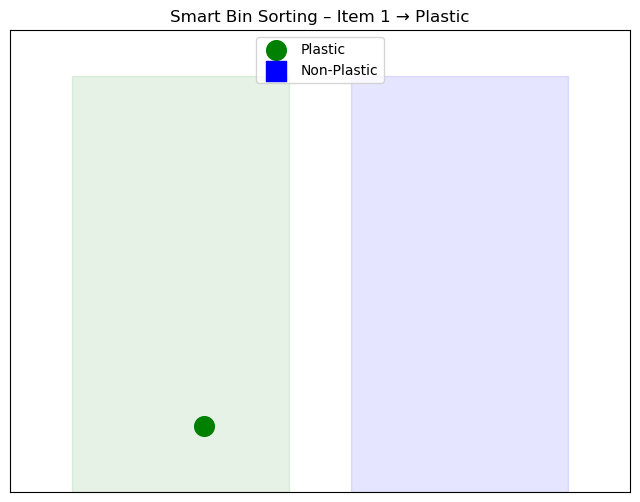

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


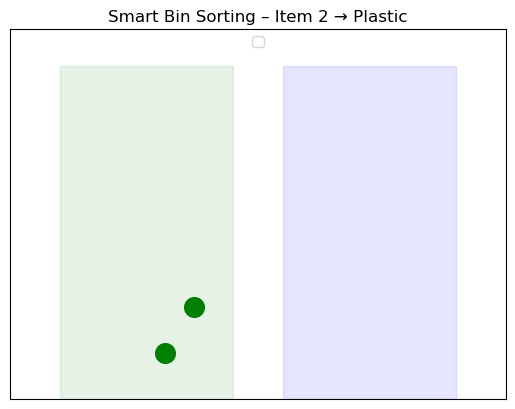

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


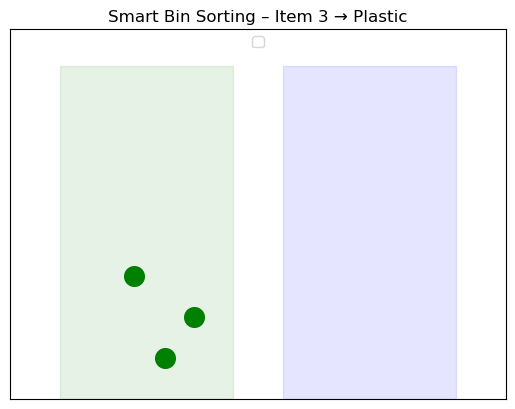

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


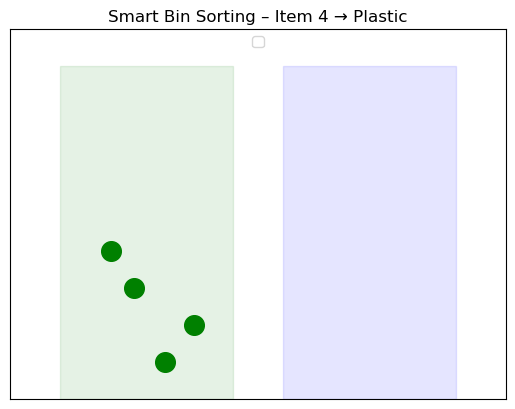

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


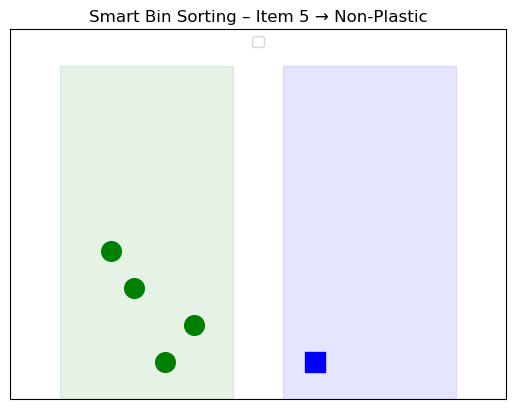

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


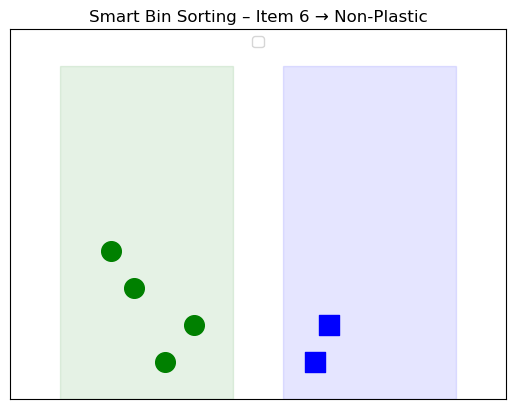

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


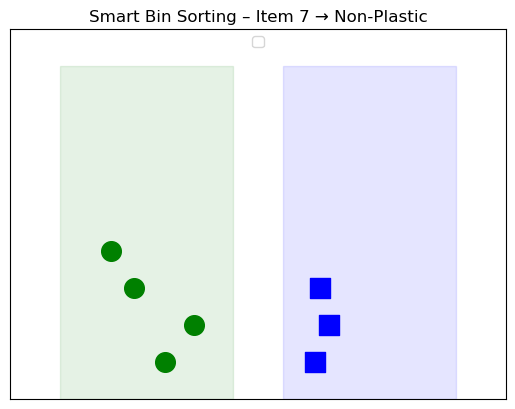

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


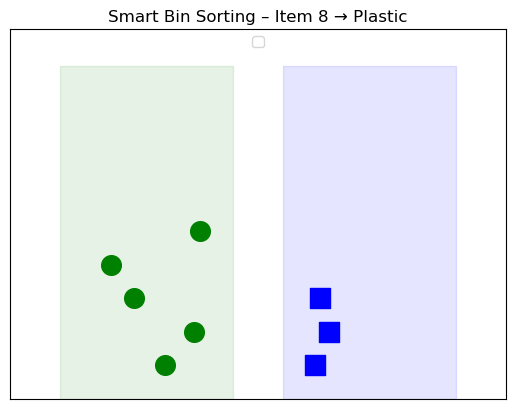

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


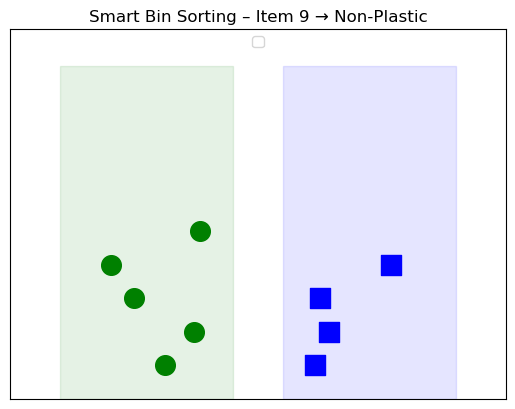

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


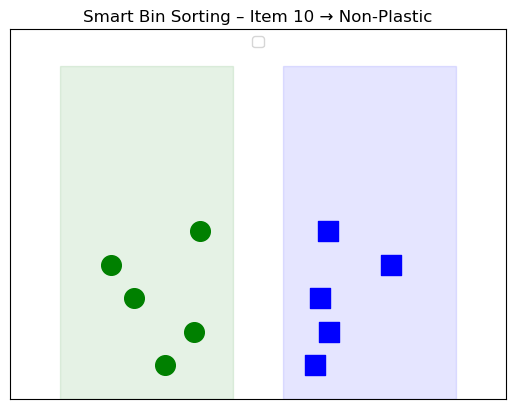

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


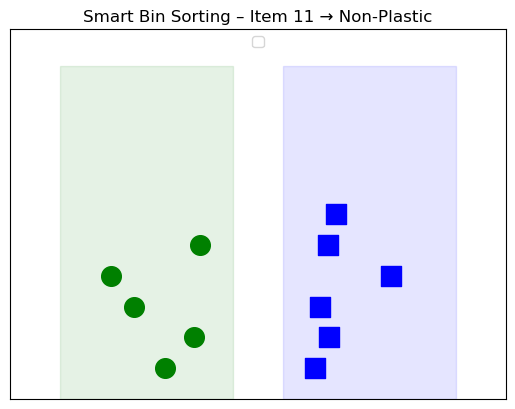

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


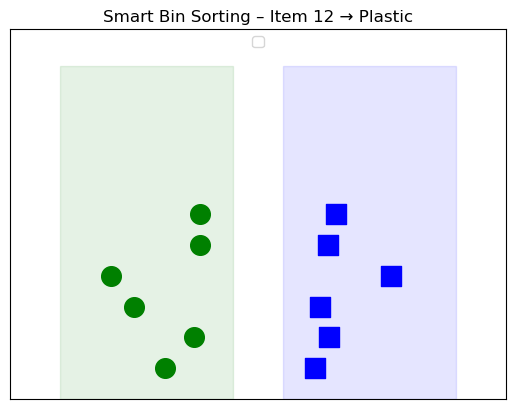

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


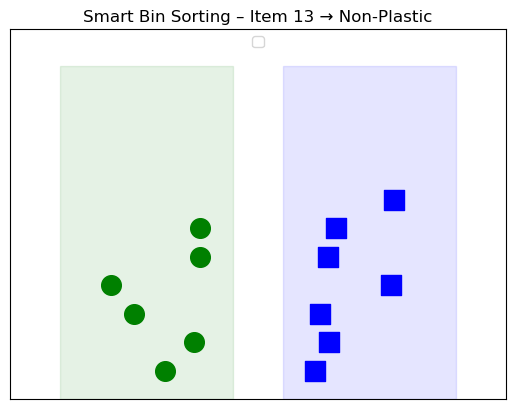

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


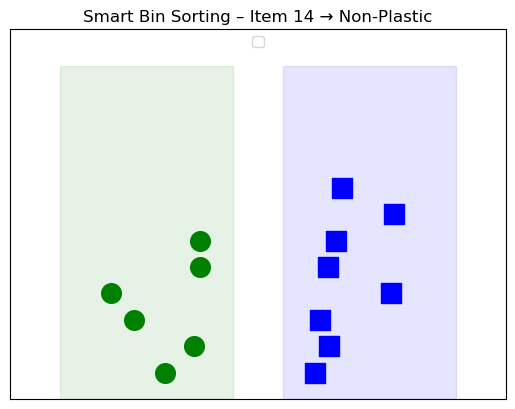

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


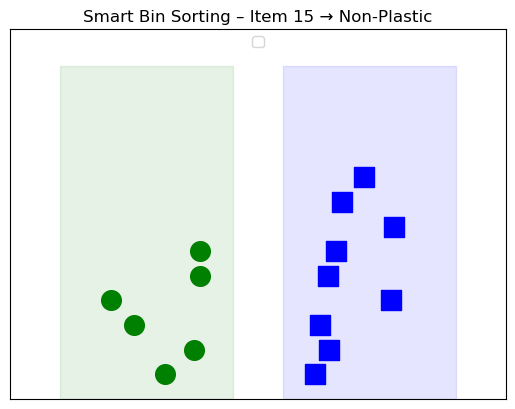

In [12]:
import time

items = X_test[:15]   # take 15 items from test set
preds = model.predict(items)

plastic_x, plastic_y = [], []
other_x, other_y = [], []

plt.figure(figsize=(8,6))
plt.ion()

for i, pred in enumerate(preds):
    plt.clf()
    if pred == 1:
        plastic_x.append(np.random.uniform(0.2, 0.4))
        plastic_y.append(len(plastic_y))
        label = "Plastic"
    else:
        other_x.append(np.random.uniform(0.6, 0.8))
        other_y.append(len(other_y))
        label = "Non-Plastic"

    # Draw bins
    plt.axvspan(0.1, 0.45, ymin=0, ymax=0.9, color="green", alpha=0.1)
    plt.axvspan(0.55, 0.9, ymin=0, ymax=0.9, color="blue", alpha=0.1)

    # Items
    plt.scatter(plastic_x, plastic_y, c="green", s=200, label="Plastic" if i==0 else "")
    plt.scatter(other_x, other_y, c="blue", s=200, marker="s", label="Non-Plastic" if i==0 else "")

    plt.title(f"Smart Bin Sorting – Item {i+1} → {label}")
    plt.xlim(0,1)
    plt.ylim(-1, max(len(plastic_y), len(other_y))+5)
    plt.xticks([]); plt.yticks([])
    plt.legend(loc="upper center")
    plt.pause(1)

plt.ioff()
plt.show()